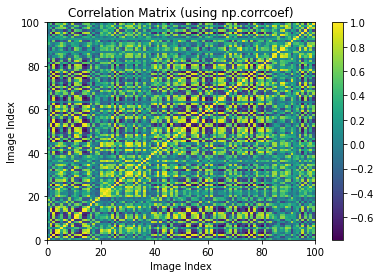

Text(0, 0.5, 'Image Index')

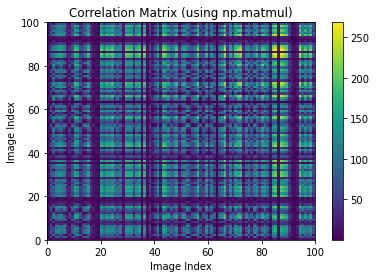

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

# Load data from 'yalefaces.mat' file
results=loadmat('yalefaces.mat')
X=results['X']

#A 
#correlation matrix
#100X100
faces100 = X[:,1:101]
# Compute correlation matrix
C100 = np.corrcoef(faces100.T)
# Plot correlation matrix using pcolor
plt.pcolor(C100)
plt.colorbar()
plt.title('Correlation Matrix (using np.corrcoef)')
plt.xlabel('Image Index')
plt.ylabel('Image Index')
plt.show()

#dot product
# Compute the dot (matrix) product of two arrays, resulting in the correlation matrix
C100=np.matmul(faces100.T,faces100)

# Plot the correlation matrix
plt.pcolor(C100)
plt.colorbar()
plt.title('Correlation Matrix (using np.matmul)')
plt.xlabel('Image Index')
plt.ylabel('Image Index')

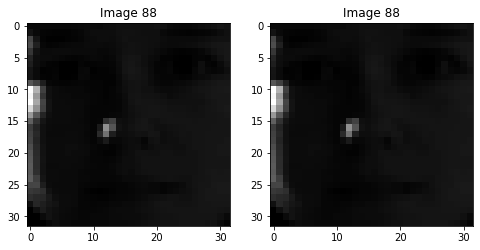

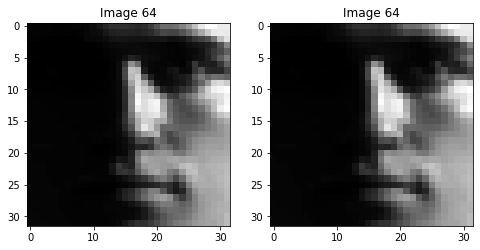

In [29]:
#B
# Find the indices of the maximum and minimum correlation coefficients
max_idx = np.unravel_index(np.argmax(C100), C100.shape)
min_idx = np.unravel_index(np.argmin(C100), C100.shape)

# Extract the corresponding images from the X matrix
max_img1 = X[:, max_idx[0]]
max_img2 = X[:, max_idx[1]]
min_img1 = X[:, min_idx[0]]
min_img2 = X[:, min_idx[1]]

# Plot the most highly correlated images
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(max_img1.reshape(32, 32), cmap='gray')
ax[0].set_title('Image {}'.format(max_idx[0]+1))
ax[1].imshow(max_img2.reshape(32, 32), cmap='gray')
ax[1].set_title('Image {}'.format(max_idx[1]+1))
plt.show()

# Plot the most uncorrelated images
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(min_img1.reshape(32, 32), cmap='gray')
ax[0].set_title('Image {}'.format(min_idx[0]+1))
ax[1].imshow(min_img2.reshape(32, 32), cmap='gray')
ax[1].set_title('Image {}'.format(min_idx[1]+1))
plt.show()

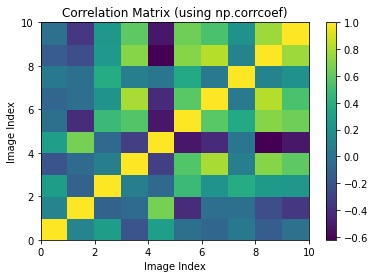

Text(0, 0.5, 'Image Index')

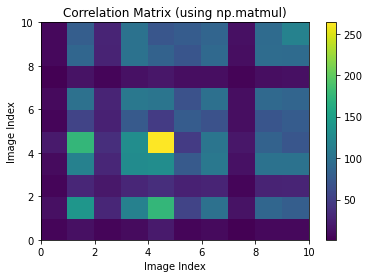

In [32]:
#C
#10X10
faces10 = np.hstack((X[:,1][:, np.newaxis], X[:,313][:, np.newaxis], X[:,512][:, np.newaxis], X[:,5][:, np.newaxis], X[:,2400][:, np.newaxis], X[:,113][:, np.newaxis], X[:,1024][:, np.newaxis], X[:,87][:, np.newaxis], X[:,314][:, np.newaxis], X[:,2005][:, np.newaxis]))

# Compute correlation matrix
C10 = np.corrcoef(faces10.T)
# Plot correlation matrix using pcolor
plt.pcolor(C10)
plt.colorbar()
plt.title('Correlation Matrix (using np.corrcoef)')
plt.xlabel('Image Index')
plt.ylabel('Image Index')
plt.show()

#dot product
# Compute the dot (matrix) product of two arrays, resulting in the correlation matrix
C10=np.matmul(faces10.T,faces10)

# Plot the correlation matrix
plt.pcolor(C10)
plt.colorbar()
plt.title('Correlation Matrix (using np.matmul)')
plt.xlabel('Image Index')
plt.ylabel('Image Index')

In [12]:
#D
# Compute the matrix Y
Y = np.dot(X, X.T)

# Compute the eigenvalues and eigenvectors of Y
eigenvalues, eigenvectors = np.linalg.eig(Y)

# Find the indices of the six eigenvectors with the largest magnitude eigenvalue
#argsort take the index of the eigenvalues in accending accending, [::-1] turn into decending, [:6] takes the first 6 (largest)
largest_indices = np.argsort(np.abs(eigenvalues))[::-1][:6]

# Get the six eigenvectors with the largest magnitude eigenvalue
largest_eigenvectors = eigenvectors[:, largest_indices]

# Print the eigenvectors
print(largest_eigenvectors)

[[ 0.02384327  0.04535378  0.05653196  0.04441826 -0.03378603  0.02207542]
 [ 0.02576146  0.04567536  0.04709124  0.05057969 -0.01791442  0.03378819]
 [ 0.02728448  0.04474528  0.0362807   0.05522219 -0.00462854  0.04487476]
 ...
 [ 0.02082937 -0.03737158  0.06455006 -0.01006919  0.06172201  0.03025485]
 [ 0.0193902  -0.03557383  0.06196898 -0.00355905  0.05796353  0.02850199]
 [ 0.0166019  -0.02965746  0.05241684  0.00040934  0.05757412  0.00941028]]


In [13]:
#E
# Compute the SVD of X
U, S, Vt = np.linalg.svd(X, full_matrices=False)

# Get the first six principal component directions
P = U[:, :6]

# Print the principal component directions
print(P)

[[-0.02384327  0.04535378  0.05653196 -0.04441826  0.03378603 -0.02207542]
 [-0.02576146  0.04567536  0.04709124 -0.05057969  0.01791442 -0.03378819]
 [-0.02728448  0.04474528  0.0362807  -0.05522219  0.00462854 -0.04487476]
 ...
 [-0.02082937 -0.03737158  0.06455006  0.01006919 -0.06172201 -0.03025485]
 [-0.0193902  -0.03557383  0.06196898  0.00355905 -0.05796353 -0.02850199]
 [-0.0166019  -0.02965746  0.05241684 -0.00040934 -0.05757412 -0.00941028]]


In [14]:
#F
# Compare the first eigenvector v1 from (d) with the first SVD mode u1 from (e) and compute the norm of difference of their absolute values
v1 = largest_eigenvectors[:, 0]
u1 = P[:, 0]
abs_diff = np.abs(v1 - u1)
norm_abs_diff = np.linalg.norm(abs_diff)
print(norm_abs_diff)


2.0000000000000004


Percentage of variance captured by each of the first 6 SVD modes:
[72.92756747 15.28176266  2.56674494  1.87752485  0.63930584  0.59243144]


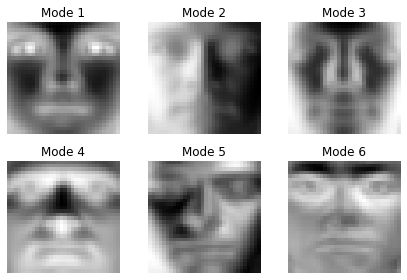

In [19]:
#G
# Compute the percentage of variance captured by each mode
variance_percentage = (S[:6]**2 / np.sum(S**2)) * 100

# Print the percentage of variance captured by each mode
print('Percentage of variance captured by each of the first 6 SVD modes:')
print(variance_percentage)

# Plot the first 6 SVD modes
fig, axs = plt.subplots(2, 3)
for i in range(6):
    ax = axs[i // 3, i % 3]
    ax.imshow(U[:, i].reshape(32, 32), cmap='gray')
    ax.axis('off')
    ax.set_title('Mode {}'.format(i+1))
plt.tight_layout()
plt.show()